In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

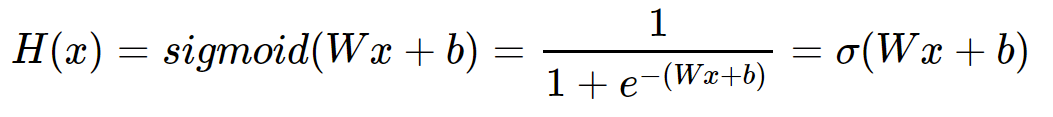
sigmoid function은 s자 형태로 그래프를 그려준다


선형회귀에서는 최적의 W와 b를 찾는 것이 목표.

그리고 W는 직선의 기울기, b는 y절편을 의미.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

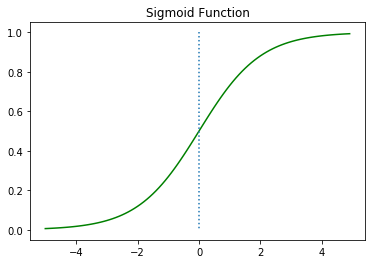

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

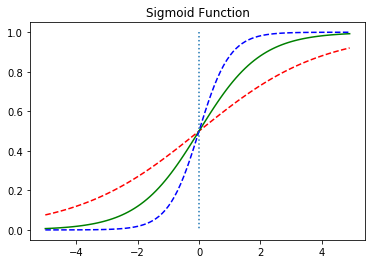

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

W = 0.5
y1 = sigmoid(W * x)

W = 1
y2 = sigmoid(W * x)

W = 2
y3 = sigmoid(W * x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

W를 변화시키면서 그래프를 그려보면

W의 값이 커지면 경사가 커지고

W의 값이 작아지면 경사가 작아진다.

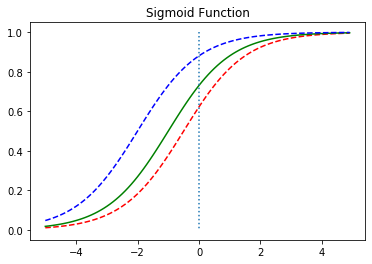

In [10]:
x = np.arange(-5.0, 5.0, 0.1)

b = 0.5
y1 = sigmoid(x + b)

b = 1
y2 = sigmoid(x + b)

b = 2
y3 = sigmoid(x + b)

plt.plot(x, y1, 'r', linestyle='--') # b의 값이 0.5일때
plt.plot(x, y2, 'g') # b의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # b의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b의 값을 변화시키면 그래프가 좌우로 이동하는 것을 볼 수 있다.

## Sigmoid function의 출력 값은 0과 1사이다.
이 특성을 이용하여 분류 작업에 이용 할 수 있다.

In [15]:
torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


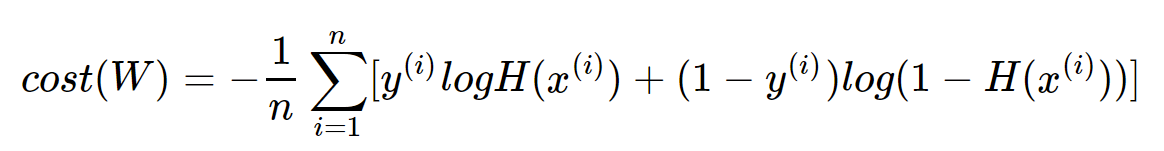
위 식은 실제값 y와 예측값 H(x)의 차이가 커지면 cost가 증가.

실제값 y와 예측값 H(x)의 차이가 작아지면 cost가 감소.

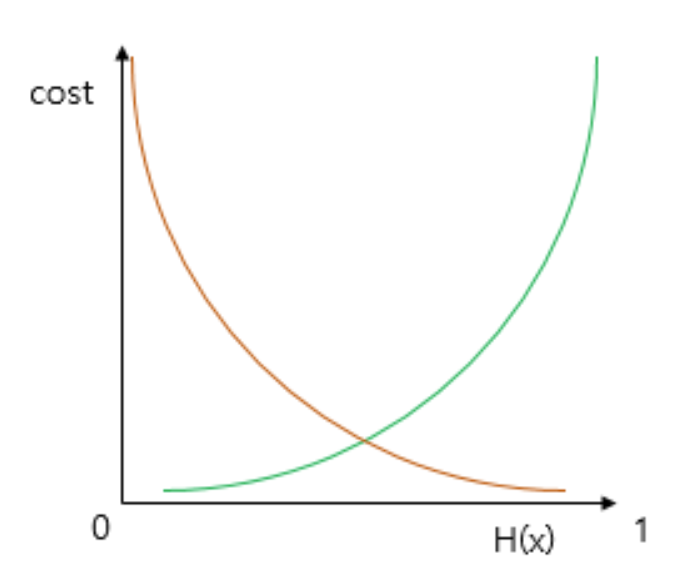
실제값이 1일 때의 그래프를 주황색으로 표현

실제값이 0일 때의 그래프를 초록색으로 표현

이제 위의 식을 이용하여 loss값을 구해 볼 것이다.

일단 한개의 원소에 대한 loss를 구하는것을 작성해보겠다.

In [17]:
loss = -((y_train[0] * torch.log(hypothesis[0])) + ((1 - y_train[0]) * torch.log(1-hypothesis[0]))) 
print(loss)

tensor([0.6931], grad_fn=<NegBackward>)


이제 모든 원소에 대해서 loss를 구한다.

In [18]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


모든 값들은 벡터로 구성되어 있기 때문에 

위의 식처럼 그냥 변수만 넣고 계산하게 되면 하나하나의 원소에 대해 오차를 구할 수 있다.


그리고 전체 오차의 평균을 구한다.


In [19]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


위의 과정을 torch에서 구현해서 제공하고 있다. 

F.binary_cross_entropy(예측값, 실제값)으로 사용하면 된다.

In [22]:
# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# model
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr=1)

#train
epochs=1000
for e in range(epochs + 1) :
    
    #cost
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis)).mean()
    
    #backpropagation
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
        print("Epochs : {}/{} Cost : {}".format(e, epochs, cost.item()))

Epochs : 0/1000 Cost : 0.6931471824645996
Epochs : 100/1000 Cost : 0.134722039103508
Epochs : 200/1000 Cost : 0.08064315468072891
Epochs : 300/1000 Cost : 0.05790002644062042
Epochs : 400/1000 Cost : 0.045299723744392395
Epochs : 500/1000 Cost : 0.037260960787534714
Epochs : 600/1000 Cost : 0.03167250379920006
Epochs : 700/1000 Cost : 0.02755594439804554
Epochs : 800/1000 Cost : 0.024394338950514793
Epochs : 900/1000 Cost : 0.02188829891383648
Epochs : 1000/1000 Cost : 0.019852163270115852


In [23]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


위 값들은 0 ~ 1사이에 분포해 있는데 이 값들이

threshold를 0,5로 줘서 true false로 분류해보자


In [24]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


## binary_cross_entropy를 사용하여 구현

In [26]:
# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# model
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr=1)

#train
epochs=1000
for e in range(epochs + 1) :
    
    #cost
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
#     cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis)).mean()
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    #backpropagation
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
        print("Epochs : {}/{} Cost : {}".format(e, epochs, cost.item()))

Epochs : 0/1000 Cost : 0.6931471824645996
Epochs : 100/1000 Cost : 0.134722039103508
Epochs : 200/1000 Cost : 0.08064312487840652
Epochs : 300/1000 Cost : 0.05790000781416893
Epochs : 400/1000 Cost : 0.04529969394207001
Epochs : 500/1000 Cost : 0.03726095333695412
Epochs : 600/1000 Cost : 0.03167252615094185
Epochs : 700/1000 Cost : 0.02755594439804554
Epochs : 800/1000 Cost : 0.024394338950514793
Epochs : 900/1000 Cost : 0.02188831754028797
Epochs : 1000/1000 Cost : 0.019852163270115852


In [27]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
